In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

rcParams['figure.figsize'] = 16, 5

In [19]:
data = pd.read_csv("some_filter_work/table.csv").T.iloc[:-5]

In [31]:
# 76 <--> Birth rate
data.index = pd.to_datetime(data.index)
s = data[76].astype(float).interpolate(limit_direction='both')
train = s

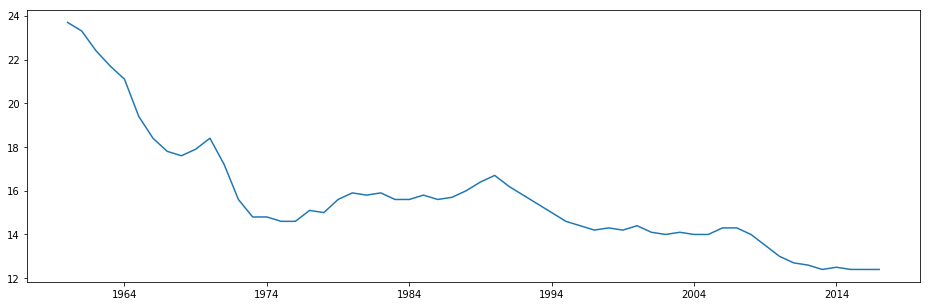

In [32]:
plt.plot(train)

In [35]:
def find_d(dat, k=0):
    adf = sm.tsa.adfuller(dat)
    if adf[0] > adf[4]['5%']:
        return find_d(dat.diff().interpolate(limit_direction='both'), k+1)
    else:
        gr = sm.graphics.tsa.plot_acf(dat, lags=20)  # Автокорреляция
        gr = sm.graphics.tsa.plot_pacf(dat, lags=20)  # Частичная автокорреляция
        return k

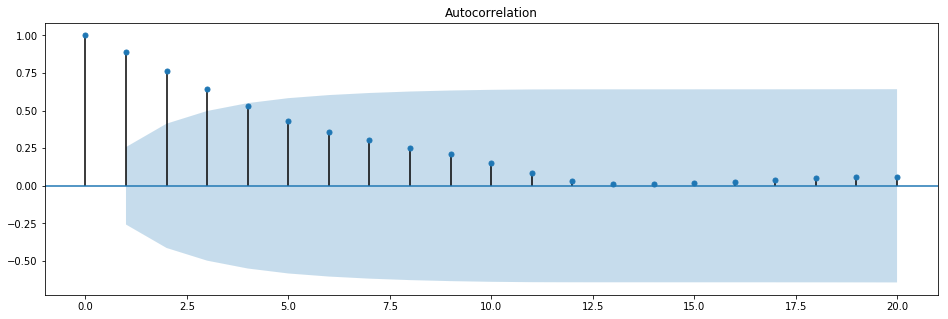

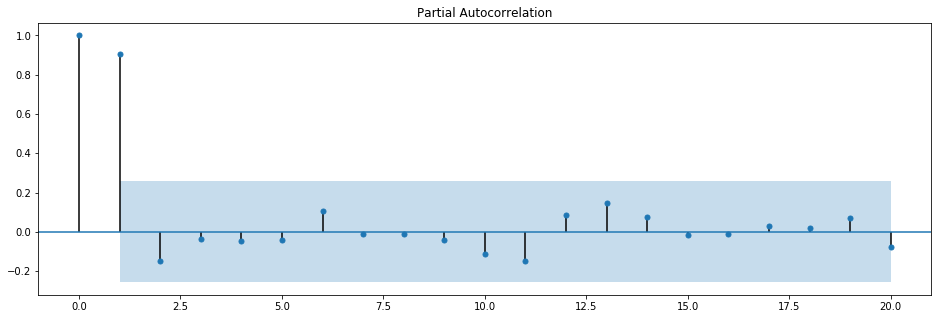

In [37]:
d = find_d(train)

In [61]:
# d = d
p = 2
q = 4

In [62]:
m1 = ARIMA(train, order=(p, d, p)).fit()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [63]:
pred1 = m1.predict(start='2017-01-01', end='2018-01-01')

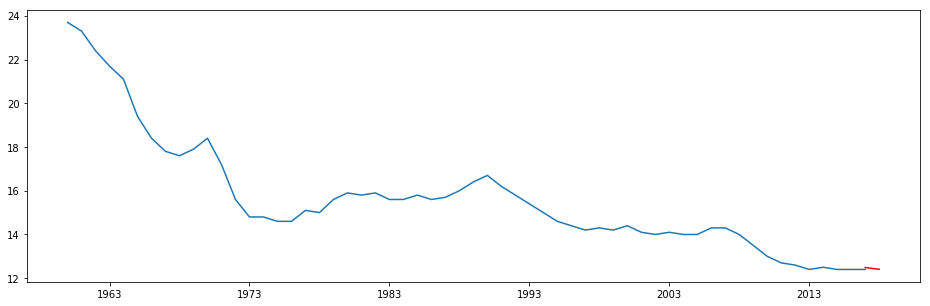

In [64]:
plt.plot(train, label='trian')
plt.plot(pred1, label='predict', c='r')

In [65]:
print(train[-1])
print(pred1[0])

12.4
12.486574145808982


In [66]:
print(pred1[1])

12.408863998659923
